In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df_test = pd.read_csv('test.csv')

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.drop('SalePrice', axis=1).isnull().sum().sum()

6965

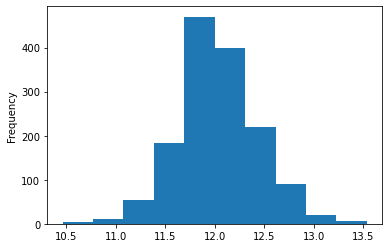

In [7]:
np.log(df.SalePrice).plot(kind='hist');

In [8]:
df.drop(['Id', 'Alley', 'PoolQC', 'MiscFeature', 'Fence', 'FireplaceQu'], axis=1, inplace=True)

In [9]:
df = pd.get_dummies(df)

In [10]:
df.fillna(df.median(), inplace=True)

In [11]:
df.drop('SalePrice', axis=1).isnull().sum().sum()

0

In [12]:
df_test.drop(['Id', 'Alley', 'PoolQC', 'MiscFeature', 'Fence', 'FireplaceQu'], axis=1, inplace=True)

In [13]:
df_test = pd.get_dummies(df_test)

In [14]:
df_test.fillna(df.median(), inplace=True)

In [15]:
X = df.drop('SalePrice', axis=1)

In [16]:
for column in X.columns:
    if column not in df_test.columns:
        X.drop(column, axis=1, inplace=True)

In [17]:
y = df.SalePrice

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [19]:
from sklearn.ensemble import RandomForestRegressor

m = RandomForestRegressor(n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_depth=40, n_jobs=-1)
m.fit(X_train, y_train)
pred_rf = m.predict(X_test)
m.score(X_test, y_test)

0.8345664985095469

In [20]:
(y_test != pred_rf).sum()

438

In [21]:
from sklearn.metrics import mean_squared_error

mean_squared_error(np.log(y_test), np.log(pred_rf))

0.022245948527480384

In [22]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)
lr.score(X_test, y_test)

0.7833418247284664

In [23]:
(y_test != pred_lr).sum()

438

In [24]:
mean_squared_error(np.log(y_test), np.log(pred_lr))

0.08526944937932542

In [25]:
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(LinearRegression(), max_trials=1000, min_samples=20)
ransac.fit(X_train, y_train)
pred_ransac = ransac.predict(X_test)
ransac.score(X_test, y_test)

0.8009365873674974

In [26]:
(y_test != pred_ransac).sum()

438

mean_squared_error(np.log(y_test), np.log(pred_ransac))

In [27]:
from sklearn.svm import SVR

svr = SVR(kernel = 'rbf', C=100)
svr.fit(X_train, y_train)
pred_svr = svr.predict(X_test)
svr.score(X_test, y_test)

-0.05591269124359455

In [28]:
(y_test != pred_svr).sum()

438

In [29]:
mean_squared_error(np.log(y_test), np.log(pred_svr))

0.15270508879207115

In [30]:
pred_rf = m.predict(df_test)

In [31]:
df_test = pd.read_csv('test.csv')

In [32]:
df_test.drop(['Alley', 'PoolQC', 'MiscFeature', 'Fence', 'FireplaceQu'], axis=1, inplace=True)

In [33]:
df_test = pd.get_dummies(df_test)

In [34]:
df_test.fillna(df.median(), inplace=True)

In [35]:
d = {'Id': df_test['Id'], 'SalePrice': pred_rf}
submission = pd.DataFrame(d)

In [36]:
submission.head()

,Id,SalePrice
0,1461,132192.50
1,1462,154000.50
2,1463,184700.40
3,1464,186659.00
4,1465,206330.01


In [37]:
submission.to_csv('my_submission.csv', index=False)